In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
dataset = 'cornell'
splits_dict = {
    'cornell': 1,
    'texas': 5,
    'wisconsin': 3
}
split = splits_dict[dataset]

multiples = 40
z_dir = '../pygcn/z_vis/' + str(dataset) + '/' + str(split) + '/'


In [3]:
epoch_list = []
for file in os.listdir(z_dir):
    if file != 'label.pt':
        name = file.split('.')[0]
        name = name.split('_')[1]        
        epoch_list.append(int(name))

epoch = max(epoch_list)
print(epoch)

201


In [4]:
z_file = z_dir + 'z_' + str(epoch) + '.pt'
label_file = z_dir + 'label.pt'

In [5]:
z = torch.load(z_file)
label = torch.load(label_file)

In [6]:
z = z.detach().numpy()
label = label.detach().numpy()

In [7]:
z.shape

(183, 183)

In [8]:
label.shape

(183,)

In [9]:
# array([3, 0, 2, 3, 4, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 0, 3, 0, 3,
#        3, 3, 3, 1, 3, 3, 0, 2, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 0, 4, 0, 3,
#        3, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2, 4, 4, 4, 3, 3, 3, 3,
#        0, 3, 3, 3, 4, 3, 3, 4, 4, 3, 0, 3, 0, 3, 4, 3, 2, 4, 2, 4, 3, 3,
#        0, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 4, 0, 0, 4, 3, 3, 0, 4, 3, 2, 3,
#        3, 0, 3, 0, 0, 3, 3, 4, 3, 3, 3, 0, 3, 0, 3, 2, 4, 2, 3, 3, 0, 4,
#        3, 4, 3, 4, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 3,
#        3, 3, 0, 2, 0, 2, 3, 3, 4, 3, 0, 3, 3, 2, 0, 3, 3, 4, 3, 2, 0, 3,
#        0, 4, 3, 3, 4, 3, 3])

In [10]:
label

array([3, 0, 2, 3, 4, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 1, 3, 3, 0, 2, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 0, 4, 0, 3,
       3, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2, 4, 4, 4, 3, 3, 3, 3,
       0, 3, 3, 3, 4, 3, 3, 4, 4, 3, 0, 3, 0, 3, 4, 3, 2, 4, 2, 4, 3, 3,
       0, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 4, 0, 0, 4, 3, 3, 0, 4, 3, 2, 3,
       3, 0, 3, 0, 0, 3, 3, 4, 3, 3, 3, 0, 3, 0, 3, 2, 4, 2, 3, 3, 0, 4,
       3, 4, 3, 4, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 3,
       3, 3, 0, 2, 0, 2, 3, 3, 4, 3, 0, 3, 3, 2, 0, 3, 3, 4, 3, 2, 0, 3,
       0, 4, 3, 3, 4, 3, 3])

In [11]:
dl, ln = np.unique(label, return_counts=True)

In [12]:
dl

array([0, 1, 2, 3, 4])

In [13]:
# texas array([ 33,   1,  18, 101,  30])
# wisconsin array([ 10,  70, 118,  32,  21])
# cornell array([ 33,   1,  18, 101,  30])
ln

array([ 33,   1,  18, 101,  30])

In [14]:
new_index = [0] * label.shape[0]
new_label_index = [0] * len(dl)
for i in range(1, len(new_label_index)):
    new_label_index[i] = new_label_index[i-1] + ln[i-1]
print(new_label_index)

for i in range(label.shape[0]):
    for l in dl:
        if label[i] == l:
            new_index[i] = new_label_index[l]
            new_label_index[l] += 1

print(new_index)


[0, 33, 34, 52, 153]
[52, 0, 34, 53, 153, 54, 1, 2, 55, 3, 56, 57, 58, 59, 60, 154, 61, 62, 4, 63, 5, 64, 65, 66, 67, 33, 68, 69, 6, 35, 70, 71, 155, 72, 156, 157, 36, 73, 74, 75, 7, 158, 8, 76, 77, 78, 37, 38, 9, 79, 10, 80, 81, 82, 83, 84, 11, 39, 40, 159, 160, 161, 85, 86, 87, 88, 12, 89, 90, 91, 162, 92, 93, 163, 164, 94, 13, 95, 14, 96, 165, 97, 41, 166, 42, 167, 98, 99, 15, 100, 101, 102, 16, 103, 104, 168, 105, 106, 107, 169, 17, 18, 170, 108, 109, 19, 171, 110, 43, 111, 112, 20, 113, 21, 22, 114, 115, 172, 116, 117, 118, 23, 119, 24, 120, 44, 173, 45, 121, 122, 25, 174, 123, 175, 124, 176, 125, 126, 26, 127, 46, 128, 129, 130, 131, 132, 133, 47, 134, 177, 135, 178, 136, 137, 138, 139, 27, 48, 28, 49, 140, 141, 179, 142, 29, 143, 144, 50, 30, 145, 146, 180, 147, 51, 31, 148, 32, 181, 149, 150, 182, 151, 152]


In [15]:
z

array([[ 0.06671333, -0.00813475,  0.01754556, ..., -0.00477884,
         0.01010097,  0.02262794],
       [ 0.00192536,  0.06593933, -0.01398554, ..., -0.00046804,
        -0.00706656, -0.0107708 ],
       [ 0.01285411, -0.02785967,  0.09250828, ...,  0.00352204,
         0.01216219,  0.03506561],
       ...,
       [ 0.0013698 , -0.00294778,  0.0141059 , ...,  0.04583677,
         0.0075182 ,  0.00576901],
       [ 0.01211045, -0.01495073,  0.01898466, ...,  0.00311633,
         0.06720263,  0.02083289],
       [ 0.01732599, -0.02517672,  0.03464061, ..., -0.00590829,
         0.0127377 ,  0.09945756]])

In [16]:
z_new = z * 1

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z_new[new_index[i]][new_index[j]] = z[i][j]


In [17]:
z_new

array([[ 0.06593933,  0.03303009,  0.04698016, ..., -0.00758231,
         0.00121153, -0.00046804],
       [ 0.02990565,  0.0597487 ,  0.0428447 , ...,  0.00175386,
         0.00405343, -0.00104554],
       [ 0.04337244,  0.04249865,  0.10557834, ..., -0.02225447,
        -0.01254558, -0.01145345],
       ...,
       [-0.01301226, -0.00084943, -0.02589357, ...,  0.11519559,
         0.04505494,  0.02636581],
       [ 0.00048775,  0.00575101, -0.01121941, ...,  0.0484592 ,
         0.07636815,  0.02413632],
       [-0.00294778, -0.00055787, -0.01190333, ...,  0.02929689,
         0.02365564,  0.04583677]])

In [18]:
z

array([[ 0.06671333, -0.00813475,  0.01754556, ..., -0.00477884,
         0.01010097,  0.02262794],
       [ 0.00192536,  0.06593933, -0.01398554, ..., -0.00046804,
        -0.00706656, -0.0107708 ],
       [ 0.01285411, -0.02785967,  0.09250828, ...,  0.00352204,
         0.01216219,  0.03506561],
       ...,
       [ 0.0013698 , -0.00294778,  0.0141059 , ...,  0.04583677,
         0.0075182 ,  0.00576901],
       [ 0.01211045, -0.01495073,  0.01898466, ...,  0.00311633,
         0.06720263,  0.02083289],
       [ 0.01732599, -0.02517672,  0.03464061, ..., -0.00590829,
         0.0127377 ,  0.09945756]])

In [19]:
def get_min_max(z):
    l_max = []
    l_min = []
    for zl in z:
        l_max.append(max(zl))
        l_min.append(min(zl))
    print(max(l_max))
    print(min(l_min))

In [20]:
def large_array(m, large=multiples, max_num=1, min_num=-1):
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            m[i][j] = min(max_num, m[i][j] * large)
            m[i][j] = max(min_num, m[i][j])
    return m

In [21]:
z = large_array(z)
z_new = large_array(z_new)
get_min_max(z)
get_min_max(z_new)

1.0
-1.0
1.0
-1.0


In [22]:
z

array([[ 1.        , -0.32538981,  0.70182253, ..., -0.19115366,
         0.40403875,  0.90511779],
       [ 0.07701443,  1.        , -0.55942161, ..., -0.01872141,
        -0.28266224, -0.43083219],
       [ 0.51416455, -1.        ,  1.        , ...,  0.14088148,
         0.48648764,  1.        ],
       ...,
       [ 0.05479209, -0.11791123,  0.56423587, ...,  1.        ,
         0.30072814,  0.23076032],
       [ 0.48441799, -0.5980292 ,  0.75938623, ...,  0.1246532 ,
         1.        ,  0.83331554],
       [ 0.69303971, -1.        ,  1.        , ..., -0.23633172,
         0.50950817,  1.        ]])

In [23]:
z_new

array([[ 1.        ,  1.        ,  1.        , ..., -0.30329228,
         0.04846107, -0.01872141],
       [ 1.        ,  1.        ,  1.        , ...,  0.07015428,
         0.16213702, -0.04182153],
       [ 1.        ,  1.        ,  1.        , ..., -0.8901786 ,
        -0.50182313, -0.45813796],
       ...,
       [-0.52049032, -0.03397718, -1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.01951019,  0.23004049, -0.44877632, ...,  1.        ,
         1.        ,  0.96545291],
       [-0.11791123, -0.02231495, -0.47613317, ...,  1.        ,
         0.94622564,  1.        ]])

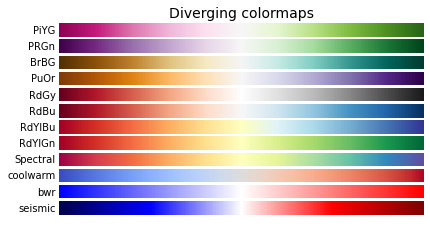

In [24]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

In [ ]:
matplotlib.rcParams.update({'font.size': 8})

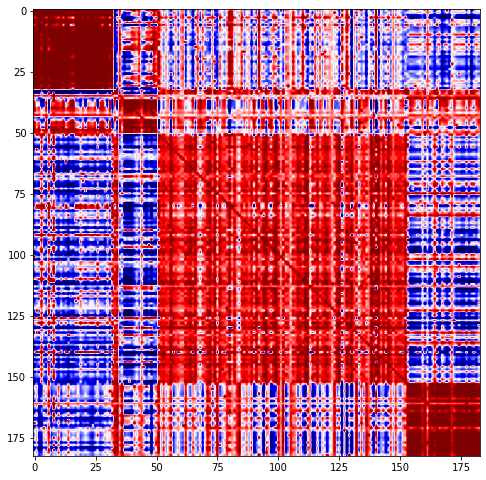

In [27]:
plt.figure(figsize = (10,10))
# plt.xlabel(xlabel='', fontsize=32)
# plt.ylabel(ylabel='', fontsize=32)
plt.xticks(size=30)
plt.yticks(size=30)
plt.imshow(z_new, cmap='seismic')
cb = plt.colorbar() 
cb.remove() 
plt.savefig('{}/{}_s{}_e{}_m{}_z.pdf'.format('z_plots', dataset, split, epoch, multiples), bbox_inches='tight')
plt.show()